# Ridge Regression

## Viés

O termo *viés* não é a interceptação em y, mas a extensão em que o modelo falha em apresentar um gráfico que se aproxime das amostras. 

Por exemplo, a linha anterior tem um viés alto, uma vez que falha em capturar a tendência nos dados.

![alt text](biased_plot.png)

Por outro lado, a proxima linha tem um viés relativamente baixo. Se tivéssemos que medir o erro quadrático médio, ele seria muito menor em comparação com o exemplo anterior.

![alt text](low_biased_plot.png)

## Variância

Em contraste com a definição estatística, a variância não se refere à disseminação dos dados em relação à média. 

Em vez disso, ele caracteriza a diferença de ajustes entre os conjuntos de dados. Em outras palavras, ele mede como a precisão de um modelo muda quando apresentado com um conjunto de dados diferente. 

Por exemplo, a linha irregular na imagem a seguir tem um desempenho radicalmente diferente em outros conjuntos de dados. Portanto, dizemos que tem uma alta variância.

![alt text](high_variance_plot.png)

Por outro lado, a linha reta tem uma variação relativamente baixa porque o erro quadrático médio é semelhante para conjuntos de dados diferentes.

![alt text](low_variance_plot.png)

## Modelo

A Ridge Regression é quase idêntica à Linear Regression, exceto que introduzimos uma pequena quantidade de viés. Em troca desse viés, obtemos uma queda significativa na variância. Em outras palavras, começando com um ajuste um pouco pior, o Ridge Regression tem um desempenho melhor em relação aos dados que não seguem exatamente o mesmo padrão dos dados nos quais o modelo foi treinado.

O viés de adição é frequentemente referido como regularização. Como o nome indica, a regularização é usada para desenvolver um modelo que se destaca na previsão de destinos para dados que seguem um padrão regular em vez de específico. Dito de outra forma, o objetivo da regularização é evitar overfitting. O sobreajuste tende a ocorrer quando usamos um polinômio de grau mais alto do que o necessário para modelar os dados.

![alt text](regularizating.png)

Para contornar esse problema, introduzimos um termo de regularização para a função de perda. Na regressão de Ridge, a função de perda é a função de mínimos quadrados lineares e a regularização é dada pela [norma-L2](https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-73003-5_1070#:~:text=L2%20norm%20is%20a%20standard,the%20values%20in%20each%20dimension.).

![alt text](sum.png)

Como estamos tentando minimizar a função de perda e **w** está incluído na soma residual dos quadrados, o modelo será forçado a encontrar um equilíbrio entre minimizar a soma residual dos quadrados e minimizar os coeficientes.

![alt text](sum2.png)

Para um polinômio de alto grau, os coeficientes das variáveis de ordem superior tenderão para 0 se os dados subjacentes puderem ser aproximados com um polinômio de baixo grau.

![alt text](plot.png)

Se definirmos o hiperparâmetro alfa para algum número grande, ao tentar encontrar o valor mínimo para a função de custo, o modelo definirá os coeficientes como 0. Em outras palavras, a linha de regressão terá uma inclinação de 0.

![alt text](alpha.png)

## Algorítimo

Para encontrar os coeficientes dado o termo de regularização adicionado, Pegamos a função de custo, fazemos um pouco de álgebra, pegamos a derivada parcial em relação a **w** (o vetor dos coeficientes), tornamos igual a 0 e então resolvemos para **w**.

![alt text](form1.png)

![alt text](form2.png)

![alt text](form3.png)

## Código

Bibliotecas necessárias para rodar o modelo:

In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

Podemos usar o `scikit-learn` para gerar uma amostra de dados adequada para a regressão

In [2]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

Agora, temos que definir o parâmetro **alpha**, que determina a "força" de regularização. Quanto maior for alpha, mais forte a regularização. Em outras palavras, quando o alpha é muito grande, o modelo será muito enviezado. Já quando alpha é 1, o modelo fica identico à regressão linear

In [3]:
alpha = 1

Agora, criamos a matriz identidade de mesma ordem da matriz X, vista nas equações préviamente 

In [4]:
n, m = X.shape
I = np.identity(m)

E finalmente, resolvemos a equação para w

In [5]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * I), X.T), y)

comparando o valor de w com os coeficientes usados para gerar os dados, podemos ver que não possuem exatamente o mesmo valor

In [6]:
w

array([87.37153533])

In [7]:
coefficients

array(90.34019153)

Olhando agora como a linha de regressão se encaixa nos dados:

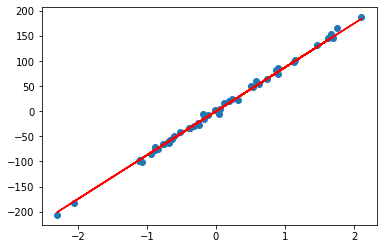

In [9]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red');

Agora, vamos fazer a mesma coisa, mas usando a implementação da Ridge Regression via `scikit-learn`. 

Primeiro, criamos e treinamos uma instância da classe `Ridge`

In [10]:
rr = Ridge(alpha=1)
rr.fit(X, y)
w = rr.coef_

Mas assim w e, portanto, a linha de regressão fica identica a da regressão linear.

In [11]:
w

array([87.39928165])

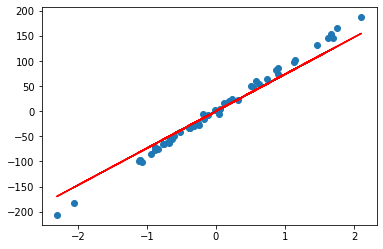

In [16]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red');

Vamos ver o que acontece se alterarmos o aplha para um numero maior

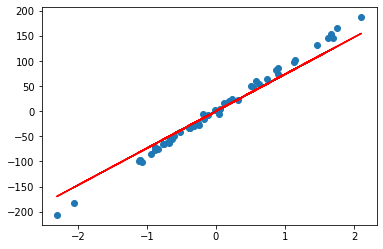

In [15]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red');

Como podemos ver, a linha de regressão não é mais perfeitamente encaixada, em outras palavras, o modelo possui um viés maior do que quando o alpha era 1.

Para notar melhor a diferença, vamos fazer com aplha sendo 100

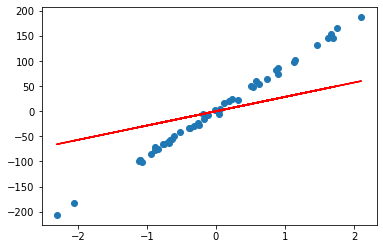

In [17]:
rr = Ridge(alpha=100)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red');

Quando alpha tende a infinito, a linha de regressão tende a uma média igual a 0, já que isso minimizaria a variância entre datasets diferentes